<a href="https://colab.research.google.com/github/AnVo01/AI/blob/main/Face_Detect_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import drive
drive.mount('/content/gdrive')

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

train_data = train.flow_from_directory('/content/gdrive/MyDrive/AI/PersonalFace/trainning',
                                       target_size = (150,150),
                                       batch_size = 10,
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/gdrive/MyDrive/AI/PersonalFace/validation',
                                       target_size = (150,150),
                                       batch_size = 10,
                                       class_mode = 'categorical')

model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
history = model.fit(train_data,batch_size=10,epochs=5,verbose=1,validation_data=validation_dataset)

Mounted at /content/gdrive
Found 163 images belonging to 2 classes.
Found 32 images belonging to 2 classes.
Epoch 1/5
17/17 [==============================] - 32s 2s/step - loss: 3.4363 - accuracy: 0.6442 - val_loss: 0.4990 - val_accuracy: 0.5625
Epoch 2/5
17/17 [==============================] - 3s 168ms/step - loss: 0.2369 - accuracy: 0.9264 - val_loss: 0.2165 - val_accuracy: 0.9375
Epoch 3/5
17/17 [==============================] - 3s 162ms/step - loss: 0.0745 - accuracy: 0.9939 - val_loss: 0.2004 - val_accuracy: 0.9375
Epoch 4/5
17/17 [==============================] - 3s 163ms/step - loss: 0.0397 - accuracy: 0.9939 - val_loss: 0.1034 - val_accuracy: 0.9375
Epoch 5/5
17/17 [==============================] - 3s 159ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 0.0956 - val_accuracy: 0.9688


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 256)               17280256  
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 17,280,770
Trainable params: 17,280,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.09563504159450531
độ chính xác kiểm tra là:  0.96875


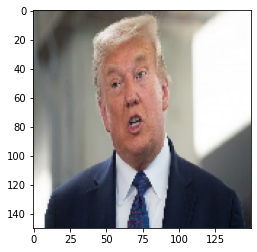

Not H.An


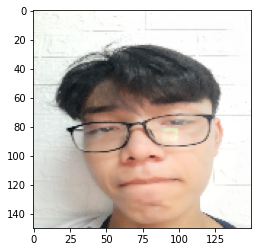

Not H.An


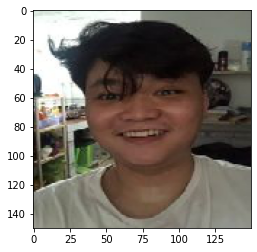

Not H.An


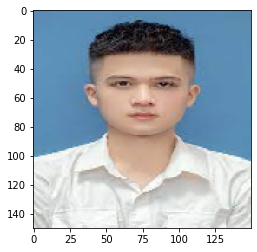

Not H.An


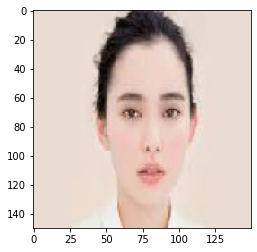

Not H.An


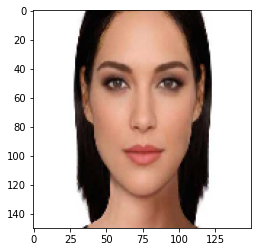

Not H.An


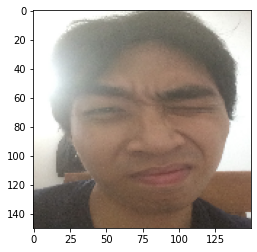

H.An


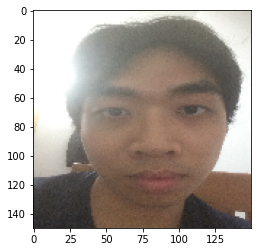

H.An


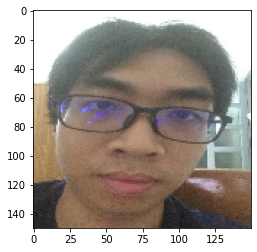

H.An


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
dir = '/content/gdrive/MyDrive/AI/PersonalFace/testing'
for i in os.listdir(dir):
  img = load_img(dir +'//'+ i, target_size=(150,150))
  plt.imshow(img)
  plt.show()
  img = img_to_array(img)
  img = img.reshape(1,150,150,3)
  image = img/255.0
  pred = np.argmax(model.predict(image))
  if pred == 0:
    print("H.An")
  else:
    print("Not H.An")


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save('/content/gdrive/MyDrive/AI/Face_Per.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/AI/Face_Per.h5')

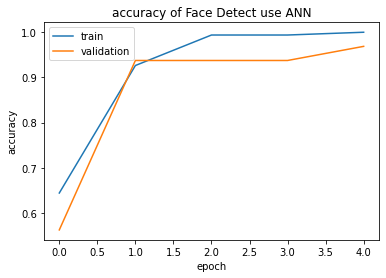

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of Face Detect use ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()